# Function to find the sum of each island

In [1]:
"""
Given a grid (list[list[float]])
return ls_sum (list[int]) as the sum of each island
"""
def numIslands(grid):
    if not grid:
        return 0

    def dfs(i, j):
        nonlocal one_sum, ls_sum, grid
        # base case to end recursive
        if i < 0 or i >= len(grid) or j < 0 or j >= len(grid[0]) or grid[i][j] == 0:
            return
        # add to sum 
        one_sum += grid[i][j]
        # mark as visited
        grid[i][j] = 0
        # recurse to left, right, up, and down
        dfs(i+1, j)
        dfs(i-1, j)
        dfs(i, j+1)
        dfs(i, j-1)

    num_islands = 0
    # init list to store information
    ls_sum = []
    # for each cell
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            # if find an island
            if grid[i][j] != 0:
                num_islands += 1
                # init a sum for dfs
                one_sum = 0
                dfs(i, j)
                # append the sum and reset it 
                ls_sum.append(int(one_sum))
                one_sum = 0

    #print("ls_sum: ", ls_sum)
    return ls_sum

In [2]:
"""
cut full zeros from four sides and pad 2 rows/cols at four sides
"""
def remove_zero_rows_and_columns(matrix):
    
    # Remove left side
    while np.sum(matrix[:, 0]) == 0:
        matrix = matrix[:, 1:]
        
    # Remove right side
    while np.sum(matrix[:, -1]) == 0:
        matrix = matrix[:, :-1]
        
    # Remove top
    while np.sum(matrix[0, :]) == 0:
        matrix = matrix[1:, :]
        
    # Remove bottom
    while np.sum(matrix[-1, :]) == 0:
        matrix = matrix[:-1, :]
    
    # Pad with zeros
    matrix = np.pad(matrix, pad_width=2, mode='constant', constant_values=0)
    
    return matrix


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to find islands and their properties
def dfs(grid, x, y, visited):
    stack = [(x, y)]
    min_row, min_col = x, y
    circumference = 0
    island_sum = 0
    
    while stack:
        r, c = stack.pop()
        if (r, c) in visited:
            continue
        visited.add((r, c))
        
        # Update min_row and min_col
        min_row = min(min_row, r)
        min_col = min(min_col, c)
        
        # Add to island_sum
        island_sum += grid[r][c]
        
        # Count boundary elements for circumference
        is_boundary = False
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nr, nc = r + dr, c + dc
            if nr < 0 or nr >= len(grid) or nc < 0 or nc >= len(grid[0]) or grid[nr][nc] == 0:
                is_boundary = True
            elif (nr, nc) not in visited:
                stack.append((nr, nc))
        if is_boundary:
            circumference += 1

    # here we return island_sum as int
    return min_row, min_col, circumference, int(island_sum)

def find_islands_info(grid):
    if not grid:
        return []

    visited = set()
    islands_info = []

    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] != 0 and (i, j) not in visited:
                min_row, min_col, circumference, island_sum = dfs(grid, i, j, visited)
                islands_info.append(((min_row, min_col), circumference, island_sum))

    return islands_info


In [12]:
# Function to find the best row
def find_best_row(grid):
    n = len(grid)
    row_sums = np.sum(grid, axis=1)
    non_zeros_per_row = np.count_nonzero(grid, axis=1)
    
    best_row = 0
    min_diff = float('inf')
    
    for i in range(1, n):
        sum_above = np.sum(row_sums[:i])
        non_zeros_above = np.sum(non_zeros_per_row[:i])
        sum_below = np.sum(row_sums[i:])
        non_zeros_below = np.sum(non_zeros_per_row[i:])
        
        avg_above = sum_above * non_zeros_above if non_zeros_above != 0 else 0
        avg_below = sum_below * non_zeros_below if non_zeros_below != 0 else 0
        
        diff = abs(avg_above - avg_below)
        
        if diff < min_diff:
            min_diff = diff
            best_row = i
            
    return best_row

In [13]:
"""
"""
def plotting(grid, islands_info, best_row):
    # Convert grid to numpy array for plotting
    grid_np = np.array(grid)

    # Plot heatmap
    plt.figure(figsize=(10, 10), dpi=250)
    sns.heatmap(grid_np, annot=False, cmap='YlGnBu', cbar=False, linewidths=0.5, linecolor='black')
     
    # Draw a horizontal line on the best row
    plt.axhline(y=best_row, color='red', linewidth=2, linestyle='--')

    # Annotate island information
    for idx, (start, circ, island_sum) in enumerate(islands_info):
        min_row, min_col = start
        plt.text(min_col + 0.5, min_row + 0.5, f"Idx: {idx+1}\nPerim: {circ}\nSum: {island_sum}", 
                 ha='left', va='top', color='indigo', fontsize=15)

    plt.title("Pressure Distribution with Annotated Information")
    plt.show()

# Import Data

### Load in kinetic data as X

In [14]:
#####################################################################
############## read in kinetic data ##################################
#####################################################################

## read in kinetic data 
## into shape 
## x_train:  (data size, rows, columns)
## x_test:  (data size, rows, columns)

import numpy as np
import pandas as pd
import xlrd
import glob
#import numpy as np
import random
from matplotlib import pyplot as plt


# list of names of files 
file_names = []
# X is the data before preprocess
X = np.zeros((70, 70, 50))
# load in every excel file from kinetic_processed
for i, xls_file in enumerate(glob.glob("kinetic_processed/*")):
    # append into file_names list
    file_names.append(xls_file)
    #print(xls_file)
    # exclude column index and create panda dataframe
    dataframe = pd.read_excel(xls_file).iloc[:, 1:]
    # convert into numpy array and store into X
    matrix = dataframe.to_numpy()
    #print(matrix.shape)
    X[i] = matrix
    
print("total number of examples: ", X.shape[0])
print("dimension of one examples: ", X.shape[1], X.shape[2])
print("obtain array X with shape: ", X.shape)

#####################################################################
############## cut one matrix into four hoofs as: hoof_set  #########
#####################################################################

def cut_into4(X, pad=False):
    # init a new dataset to store hoofs: hoof_set 
    #hoof_set = np.zeros((280, 30, 20))
    hoof_set = []
    # loop through all 70 cows 
    for cow in range(70):
        # take one matrix 
        one_matrix = X[cow, :, :]
        # 2024-06-21, apply hard thershold to avoid soft connection in island isolation
        one_matrix[one_matrix < 3] = 0
        
        """control padding"""
        if pad == True: 
            # if pad, pad 5 zeros to the surounding
            one_matrix = np.pad(one_matrix, [(5, 5), (5, 5)], mode='constant')
            
            # for each hoof, we crop it with height 30 and width 20 
            # top left hoof
            top_left = one_matrix[:35, :25] 
            # top right hoof 
            top_right = one_matrix[:35, -25:] 
            # bottom left hoof 
            bottom_left = one_matrix[-35:, :25] 
            # bottom right hoof 
            bottom_right = one_matrix[-35:, -25:] 

        else: 
            # for each hoof, we crop it with height 30 and width 20 
            # top left hoof
            top_left = one_matrix[:30, :20] 
            # top right hoof 
            top_right = one_matrix[:30, -20:] 
            # bottom left hoof 
            bottom_left = one_matrix[-30:, :20] 
            # bottom right hoof 
            bottom_right = one_matrix[-30:, -20:] 
            
        hoof_set.append(top_left)
        hoof_set.append(top_right)
        hoof_set.append(bottom_left)
        hoof_set.append(bottom_right)
        
    return np.array(hoof_set)
    


total number of examples:  70
dimension of one examples:  70 50
obtain array X with shape:  (70, 70, 50)


In [15]:
"""
using func to get X data
"""
hoof_set = cut_into4(X, pad=True)
print("obtained X value as hoof_set： ", hoof_set.shape)

"""
Print a hoof (np 2d)
"""
def print_hoof(hoof):
    test = hoof.tolist()
    for row in test:
        print([int(i) for i in row])
        
print_hoof(hoof_set[1])

obtained X value as hoof_set：  (280, 35, 25)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 5, 0, 3, 9, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 16, 27, 18, 29, 59, 62, 21, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 48, 56, 86, 112, 162, 99, 26, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 43, 67, 101, 126, 182, 165, 92, 18, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 29, 53, 73, 111, 133, 166, 120, 43, 5, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 9, 35, 68, 111, 121, 146, 93, 52, 8, 0, 0, 0

In [16]:
print("Read in hoof_score_number as label Y")
# name of the excel file
excel = 'hoof_score_number.xlsx'
# read in by panda
df_hoof = pd.read_excel(excel)
# dropping the rows having NaN values
df_hoof = df_hoof.dropna()
# convert into numpy array: np_hoof
np_hoof = np.array(df_hoof)
# convert into list: ls_hoof
ls_hoof = np_hoof.tolist()
# strip extra dimension
ls_hoof_int = [i[0] for i in ls_hoof]

#print("obtain np_hoof with shape: ", np_hoof.shape)
print("obtain ls_hoof_int with length: ", len(ls_hoof_int))

Read in hoof_score_number as label Y
obtain ls_hoof_int with length:  280


Read in hoof_score_number as label Y
obtain ls_hoof_int with length:  280
check length:  280
obtain bi_ls_hoof
----- Value -----
[0, 1]
----- Count -----
[206, 74]


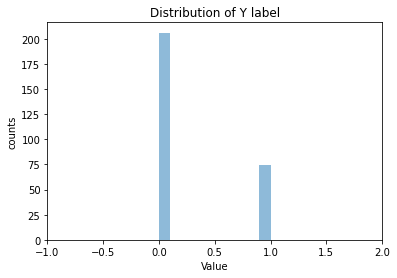

In [17]:
#####################################################################
############## read in excel file: hoof_score_number  ###############
#####################################################################

print("Read in hoof_score_number as label Y")
# name of the excel file
excel = 'hoof_score_number.xlsx'
# read in by panda
df_hoof = pd.read_excel(excel)
# dropping the rows having NaN values
df_hoof = df_hoof.dropna()
# convert into numpy array: np_hoof
np_hoof = np.array(df_hoof)
# convert into list: ls_hoof
ls_hoof = np_hoof.tolist()
# strip extra dimension
ls_hoof_int = [i[0] for i in ls_hoof]
#print(ls_hoof_int, len(ls_hoof_int))
#print("obtain np_hoof with shape: ", np_hoof.shape)
print("obtain ls_hoof_int with length: ", len(ls_hoof_int))

#####################################################################
############## convert into binary label: obtain bi_ls_hoof  ########
#####################################################################

# try binary label 
"""
arg: 
    -- list with 1, 2, 3 
return: 
    -- list with 0, 1
"""
def binarize_ls_hoof(ls): 
    # init new_ls
    new_ls = []
    for i in range(len(ls)): 
        # class 1 is normal shape
        if int(ls[i]) == 1 : 
            new_ls.append(1) 
        # class 0 is abnormla shape
        elif int(ls[i]) == 3 or int(ls[i]) == 2: 
            new_ls.append(0) 
        else: 
            print(i)
            print(ls[i])
            print("encounter invalid number")
    print("check length: ", len(new_ls))
    return new_ls

# func to print the number for different scores 
from collections import Counter
"""
arg: 
    -- y: a list 
return: 
    -- a histogram
"""
def inspect_y(y, plot=True): 
    print("----- Value -----")
    print([i for i in Counter(y).keys()]) # equals to list(set(words))
    print("----- Count -----")
    print([i for i in Counter(y).values()]) # counts the elements' frequency
    
    if plot:
        data = y
        plt.xlim([min(data)-1, max(data)+1])
        plt.hist(data, alpha=0.5)
        plt.title('Distribution of Y label')
        plt.xlabel('Value')
        plt.ylabel('counts')
        plt.show()
    
# convert ls_hoof into binary number
bi_ls_hoof = binarize_ls_hoof(ls_hoof_int)
# inspect bi_ls_hoof
print("obtain bi_ls_hoof")
inspect_y(bi_ls_hoof)

In [18]:
X = hoof_set
Y = bi_ls_hoof
print("Got X and Y: ", X.shape, len(Y))

Got X and Y:  (280, 35, 25) 280


# Visualization for vets

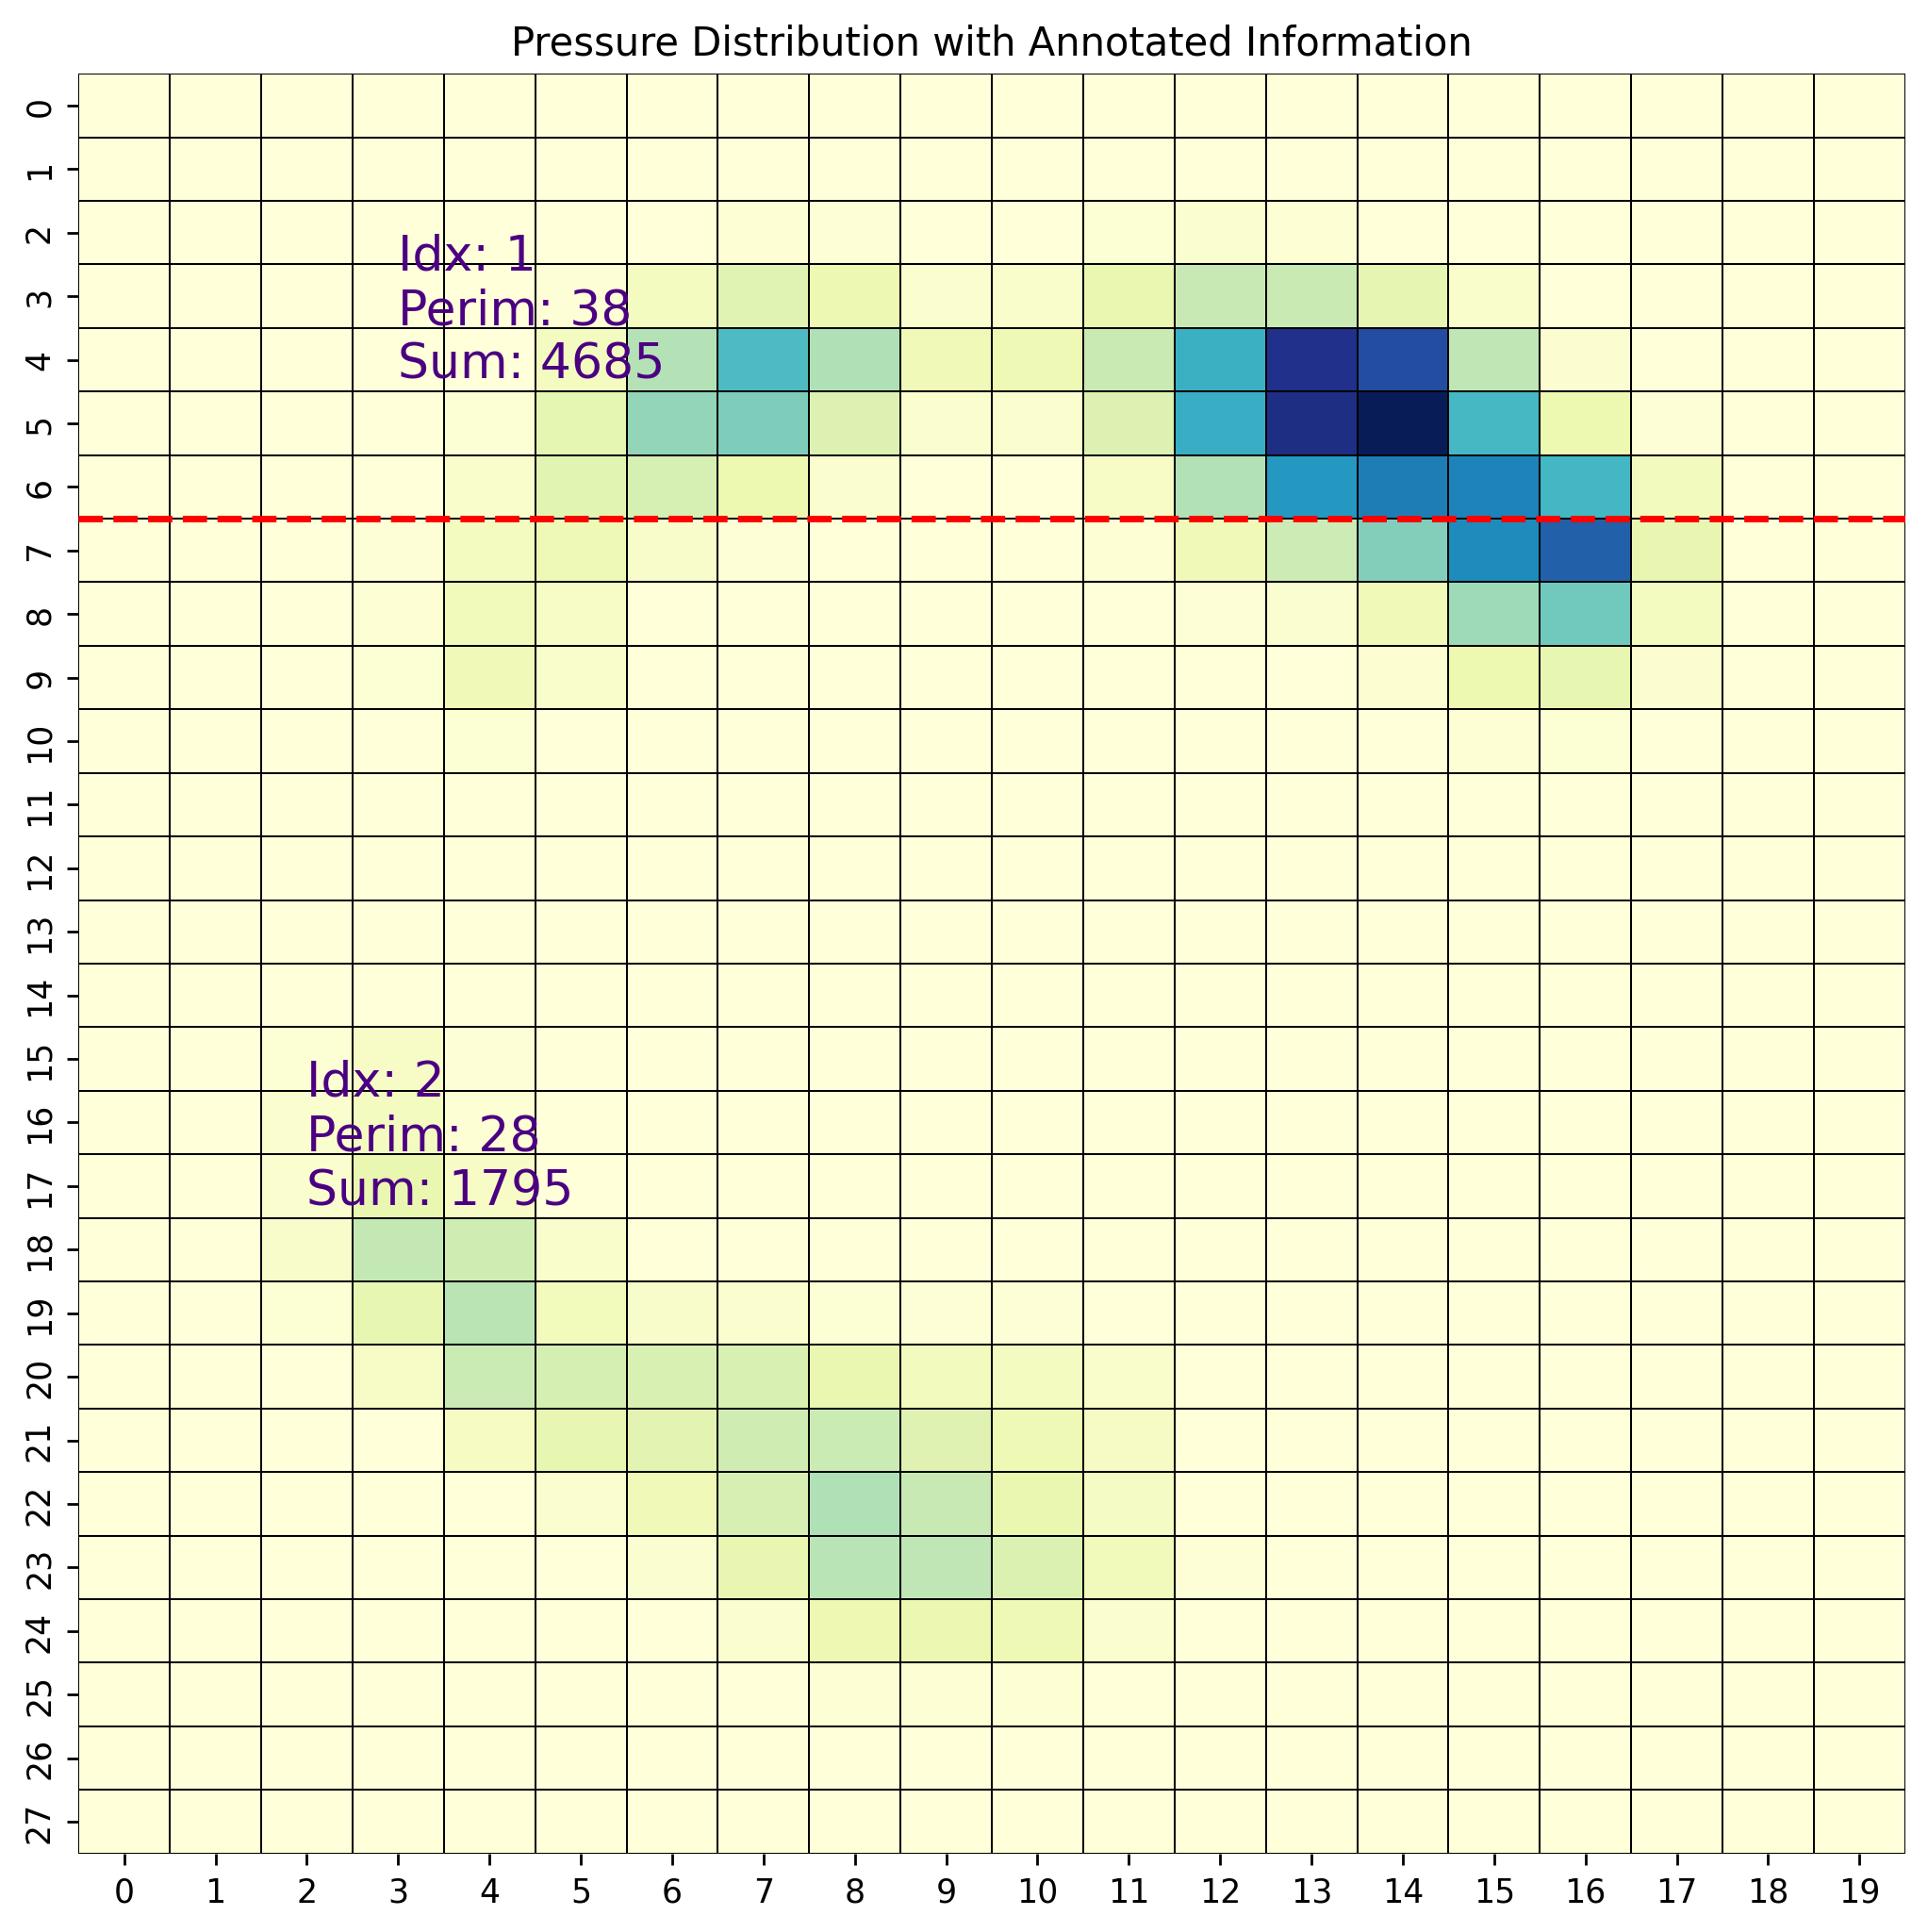

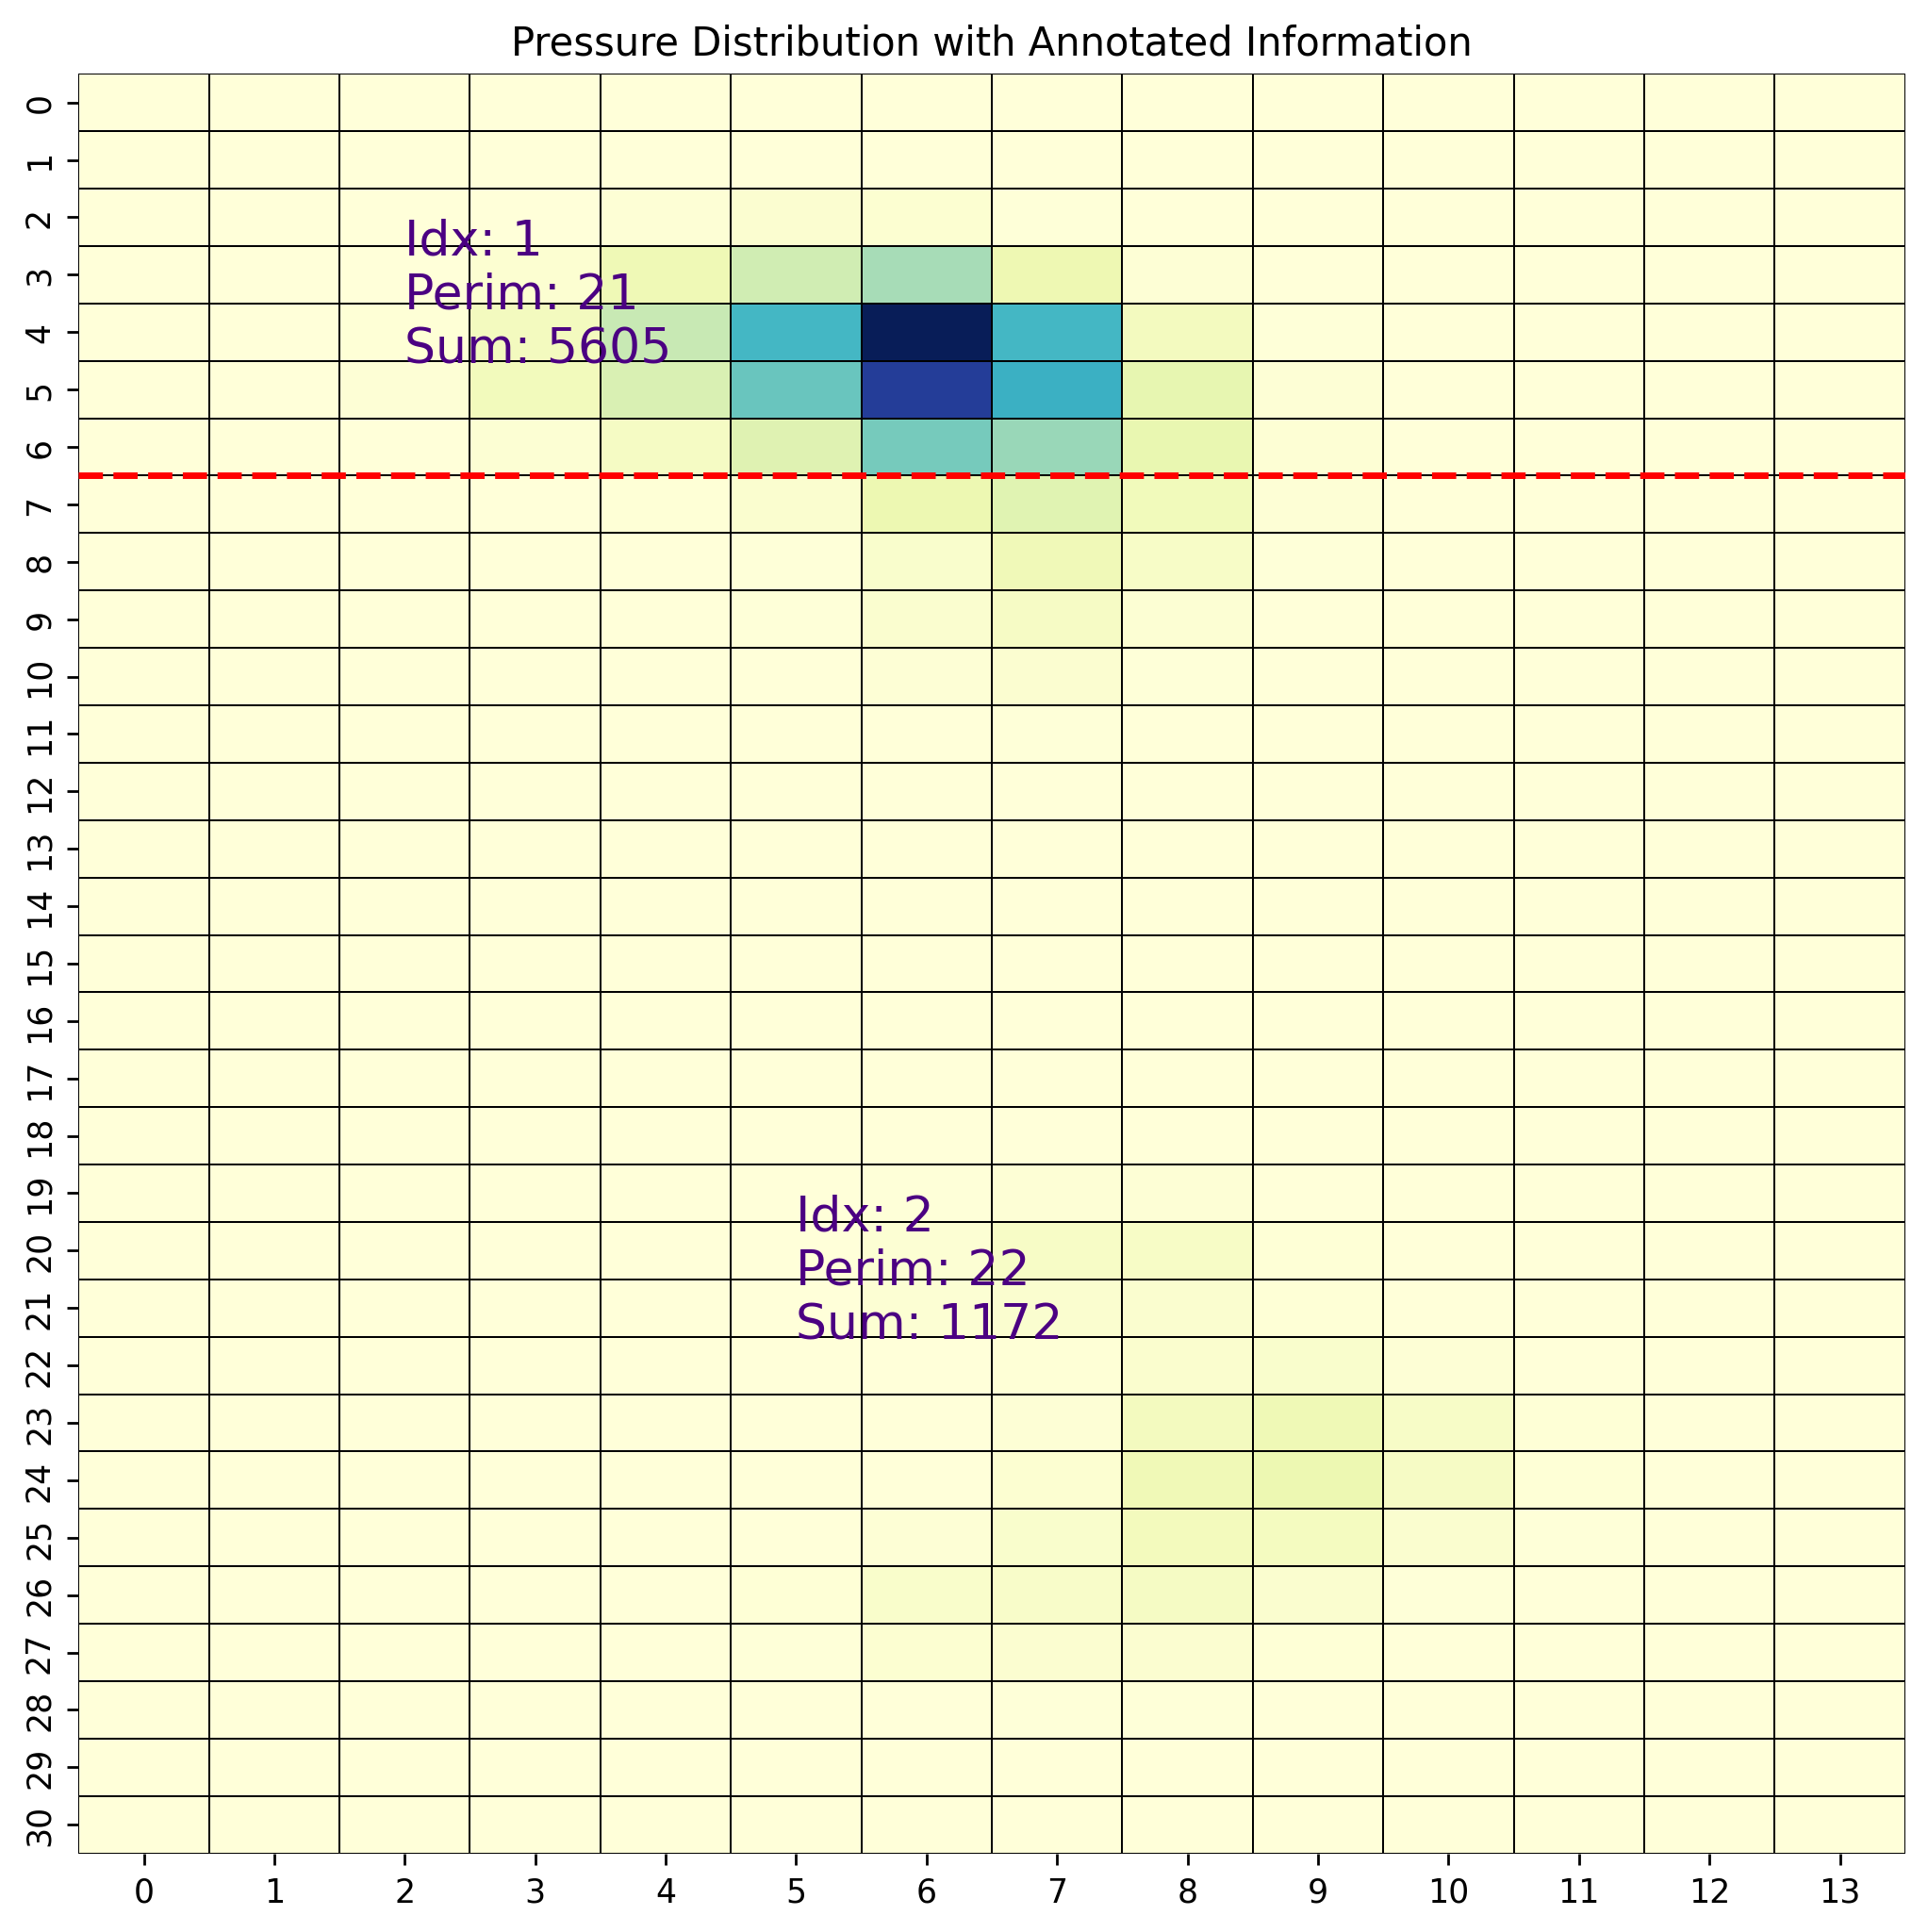

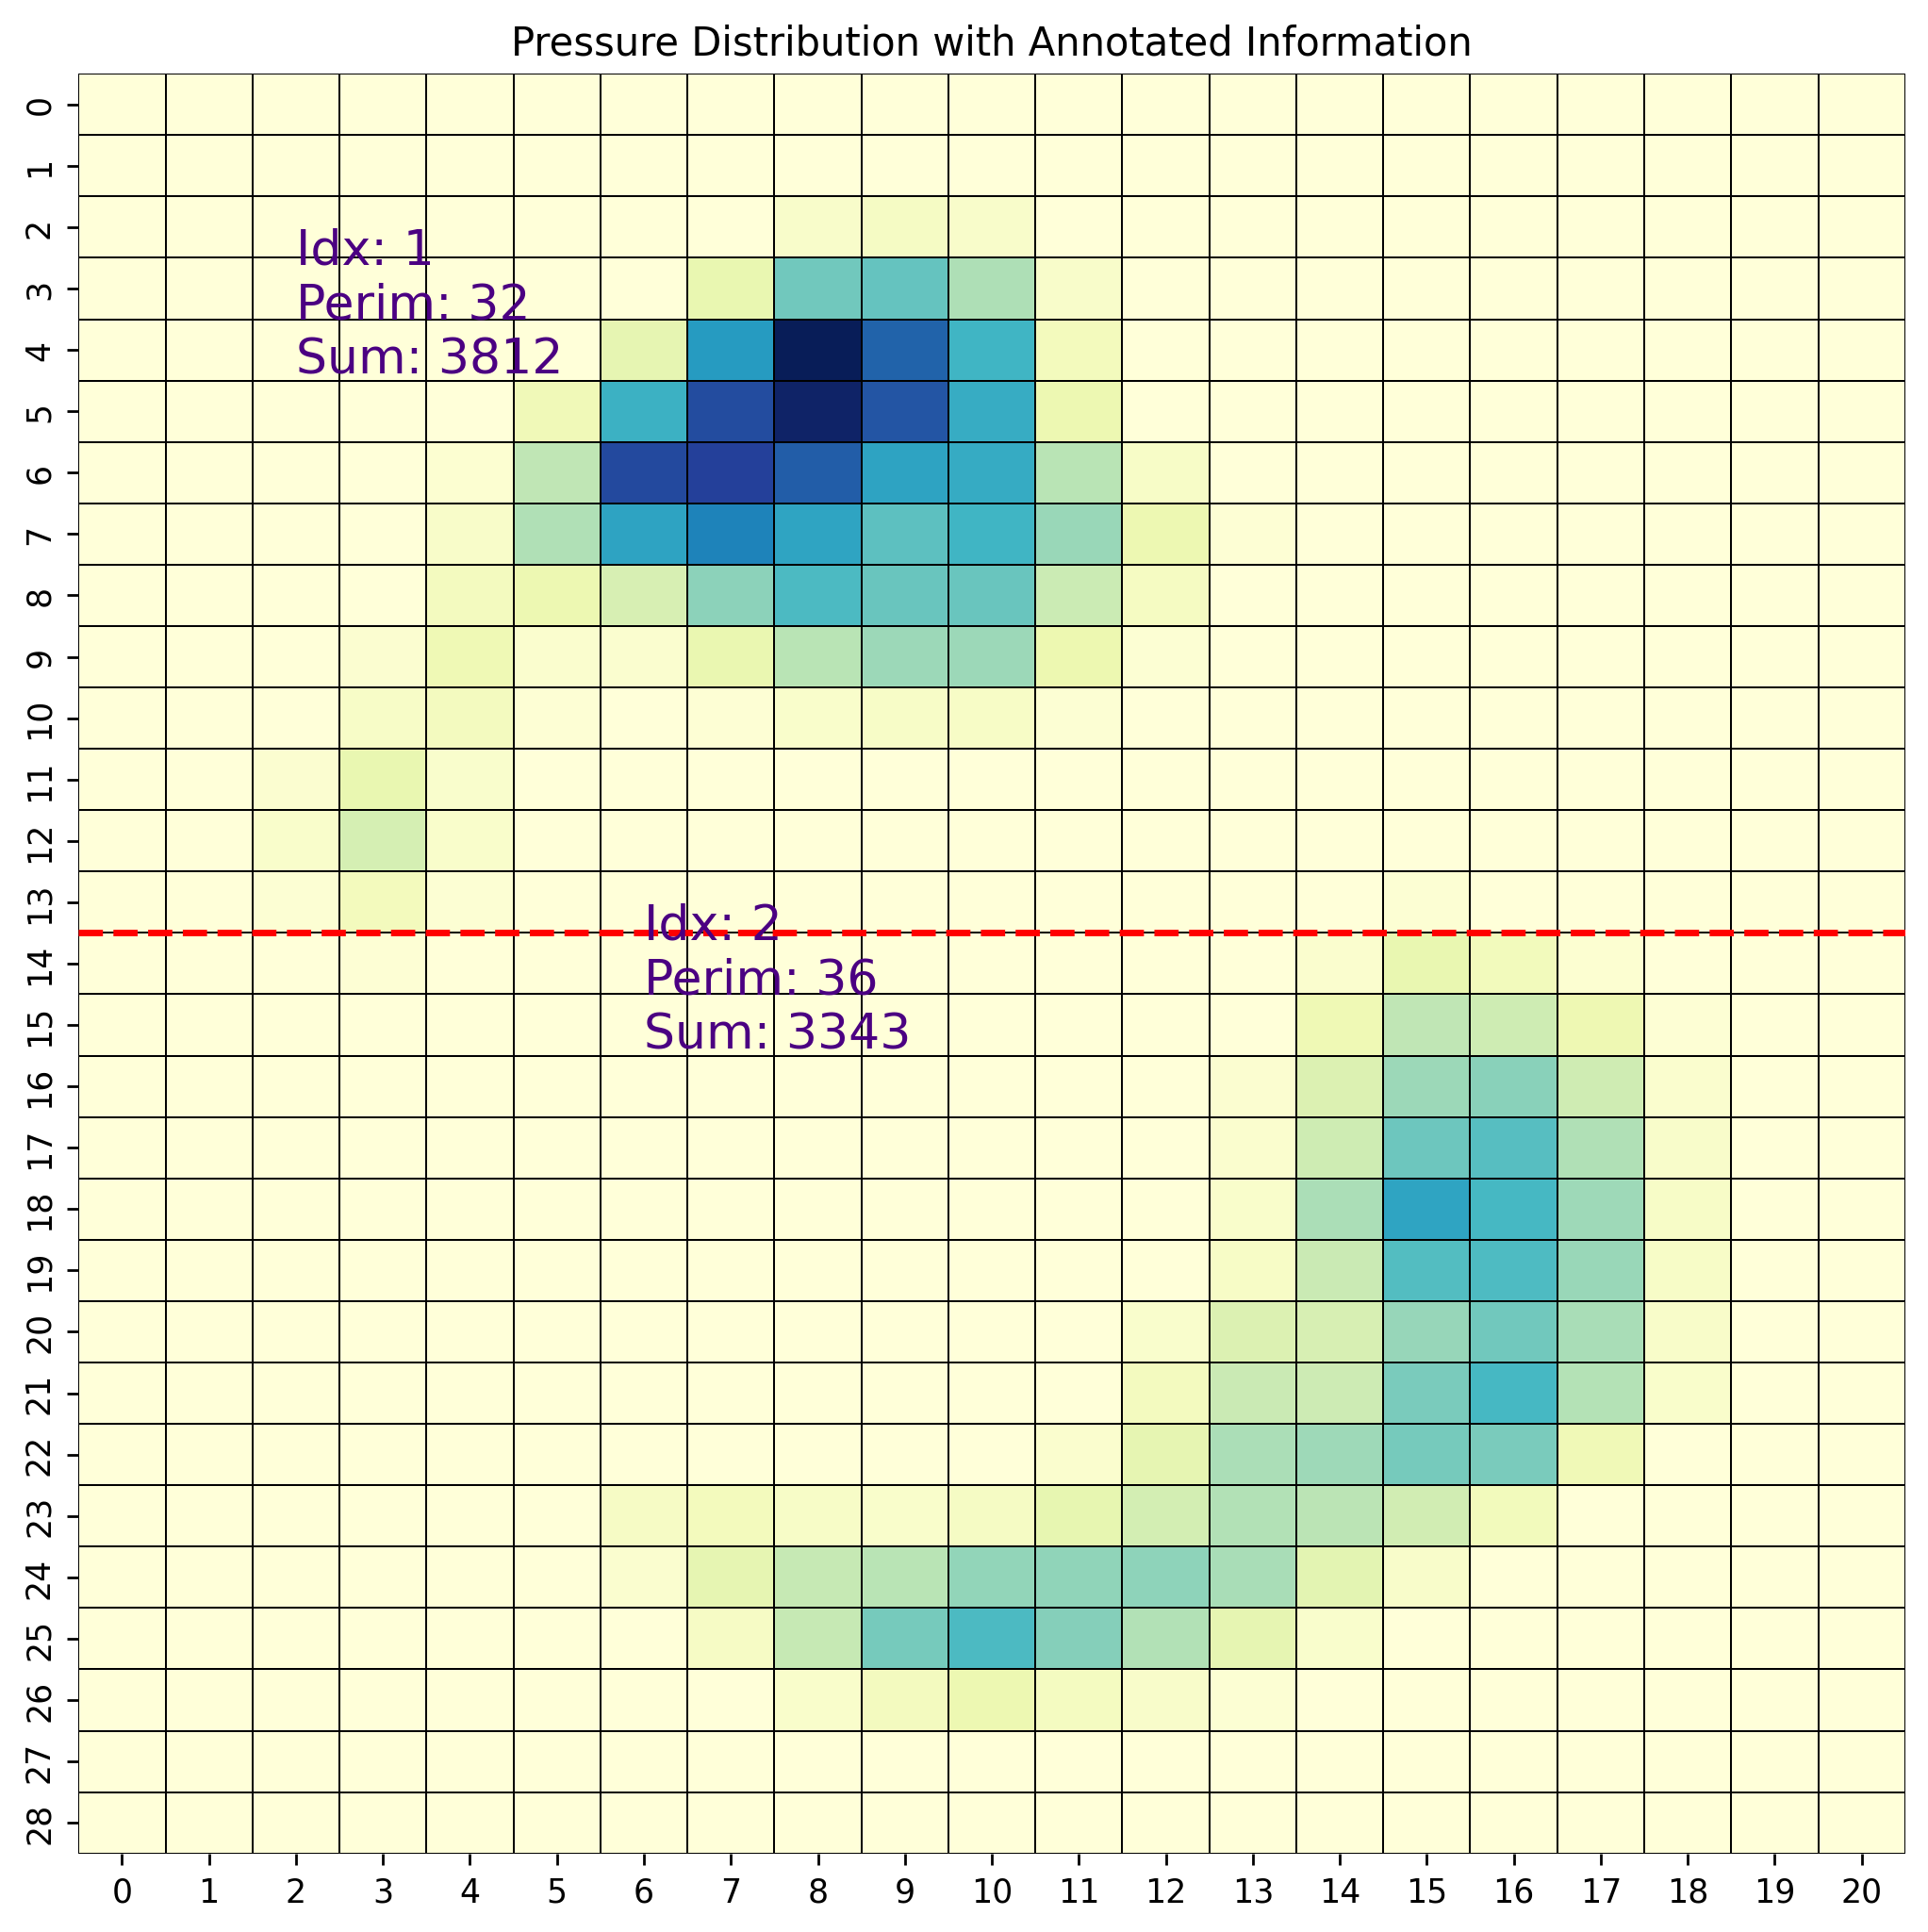

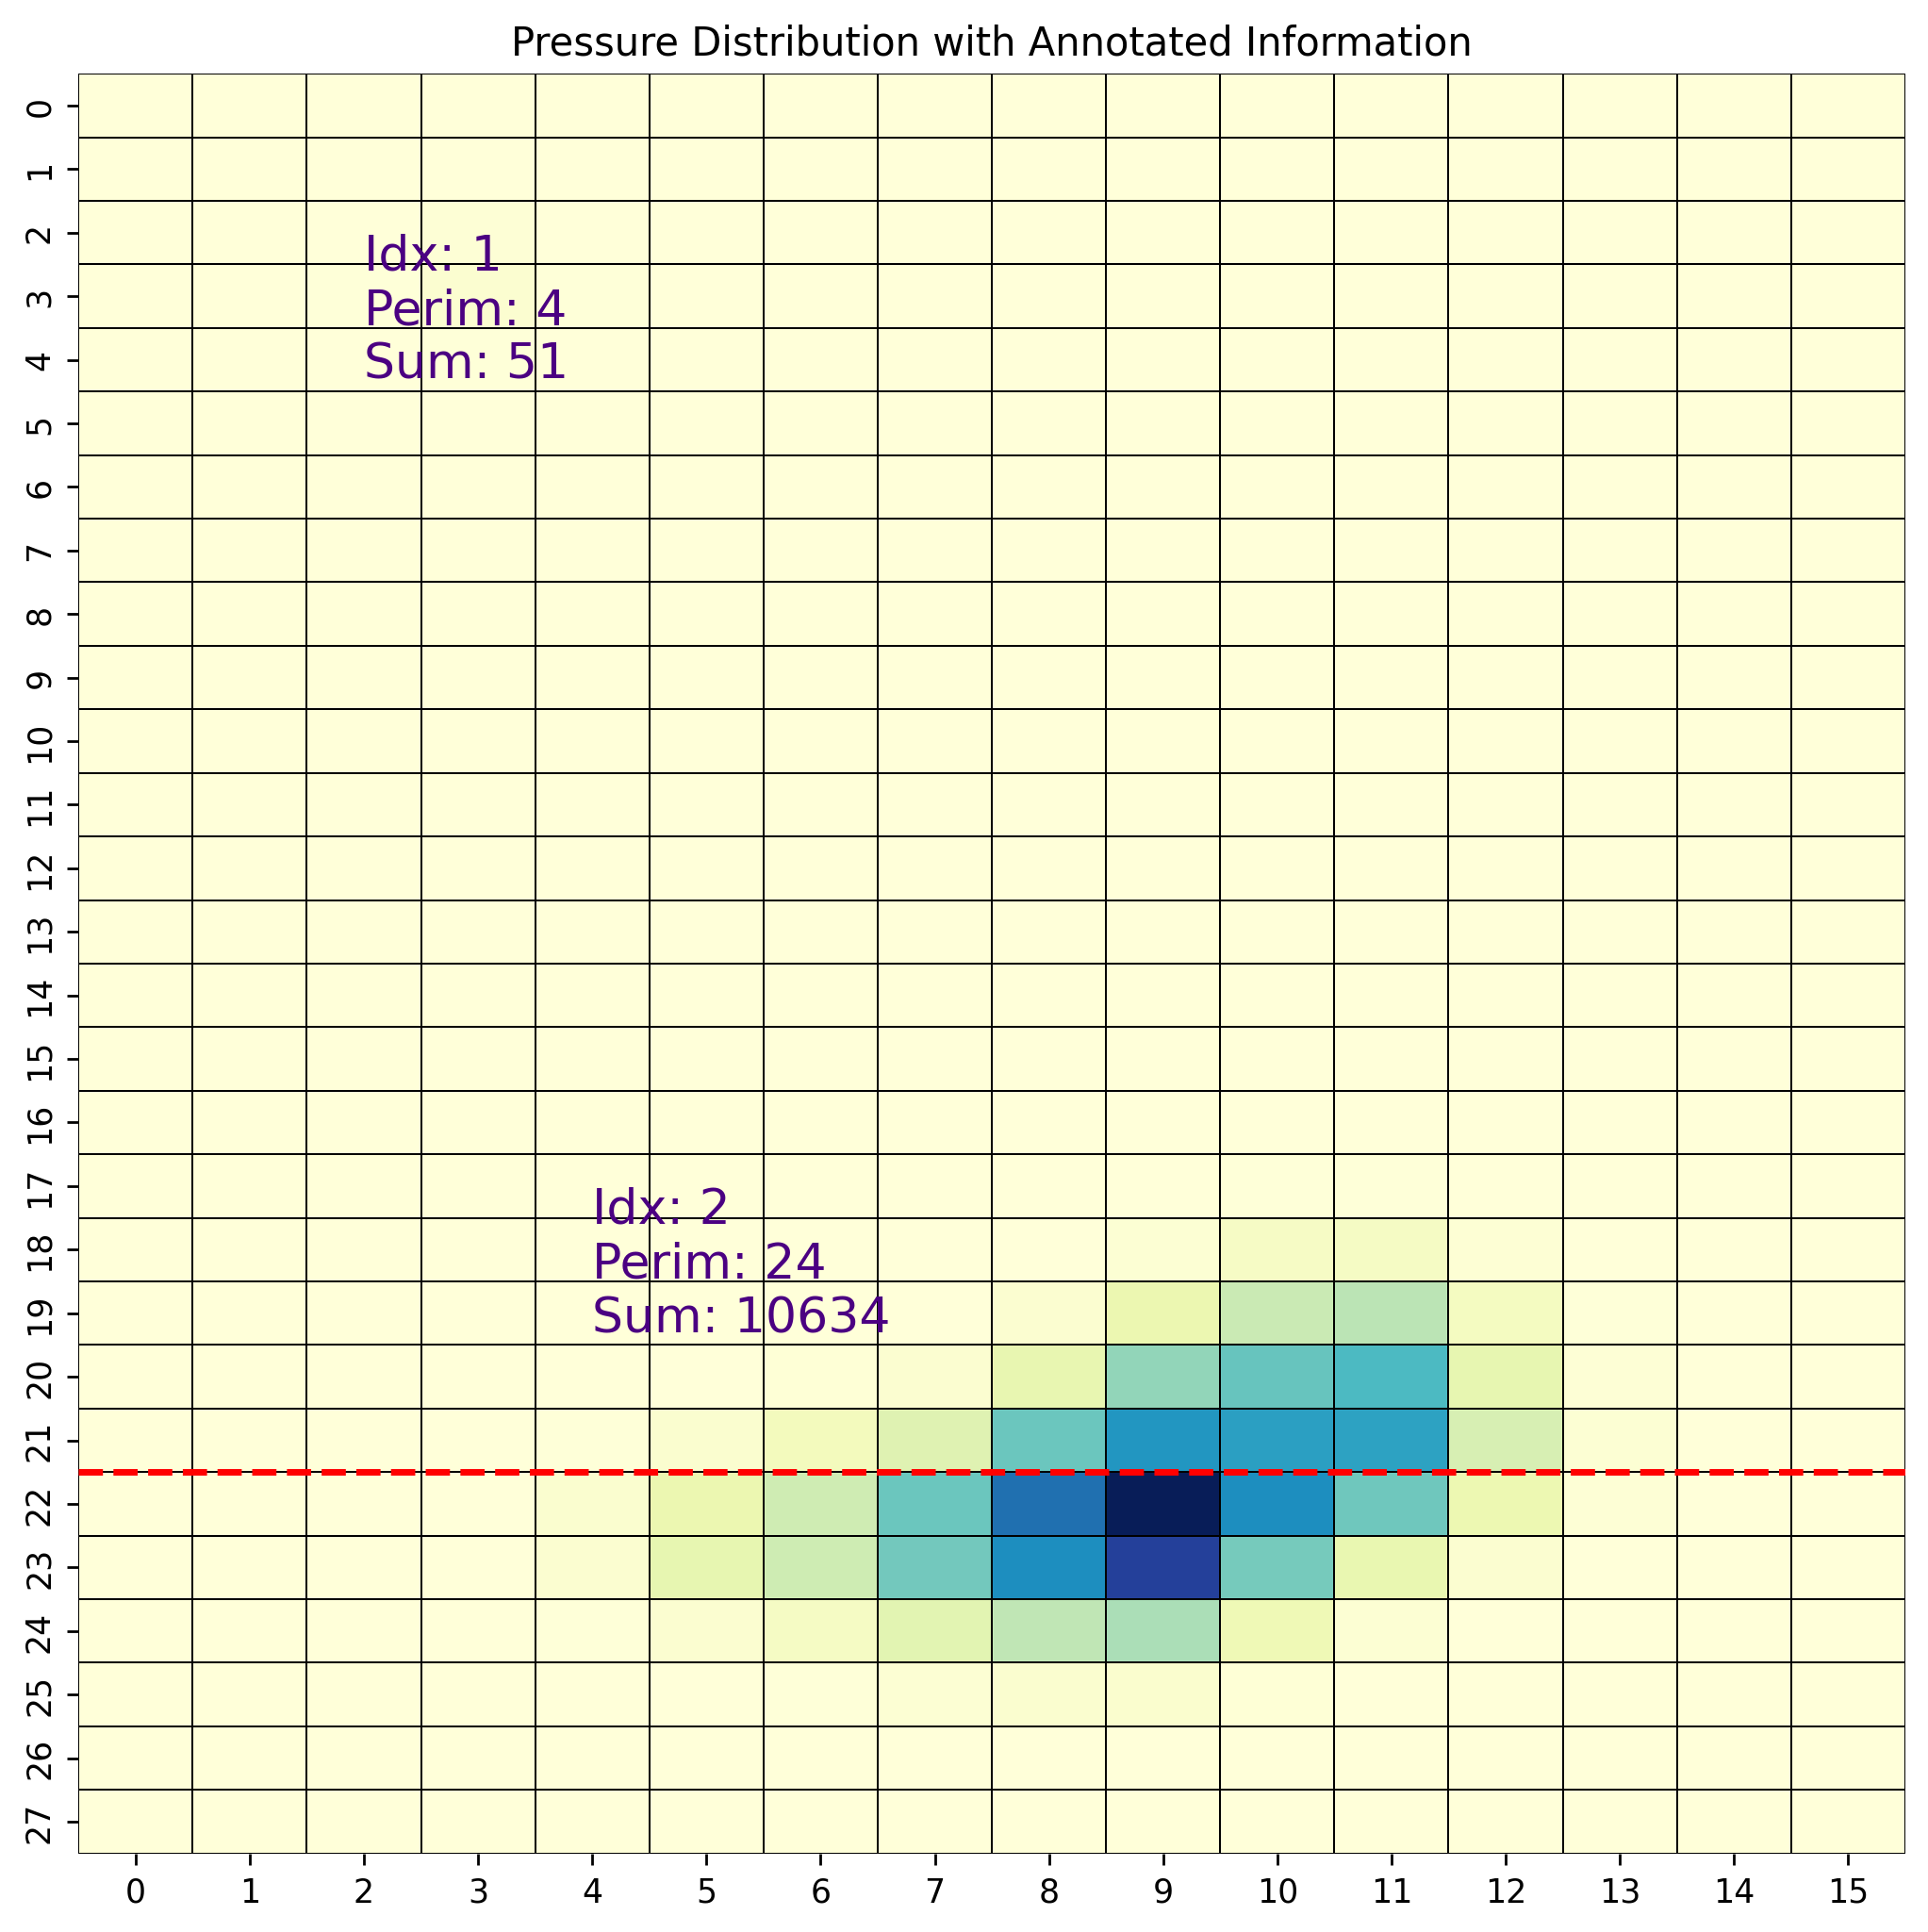

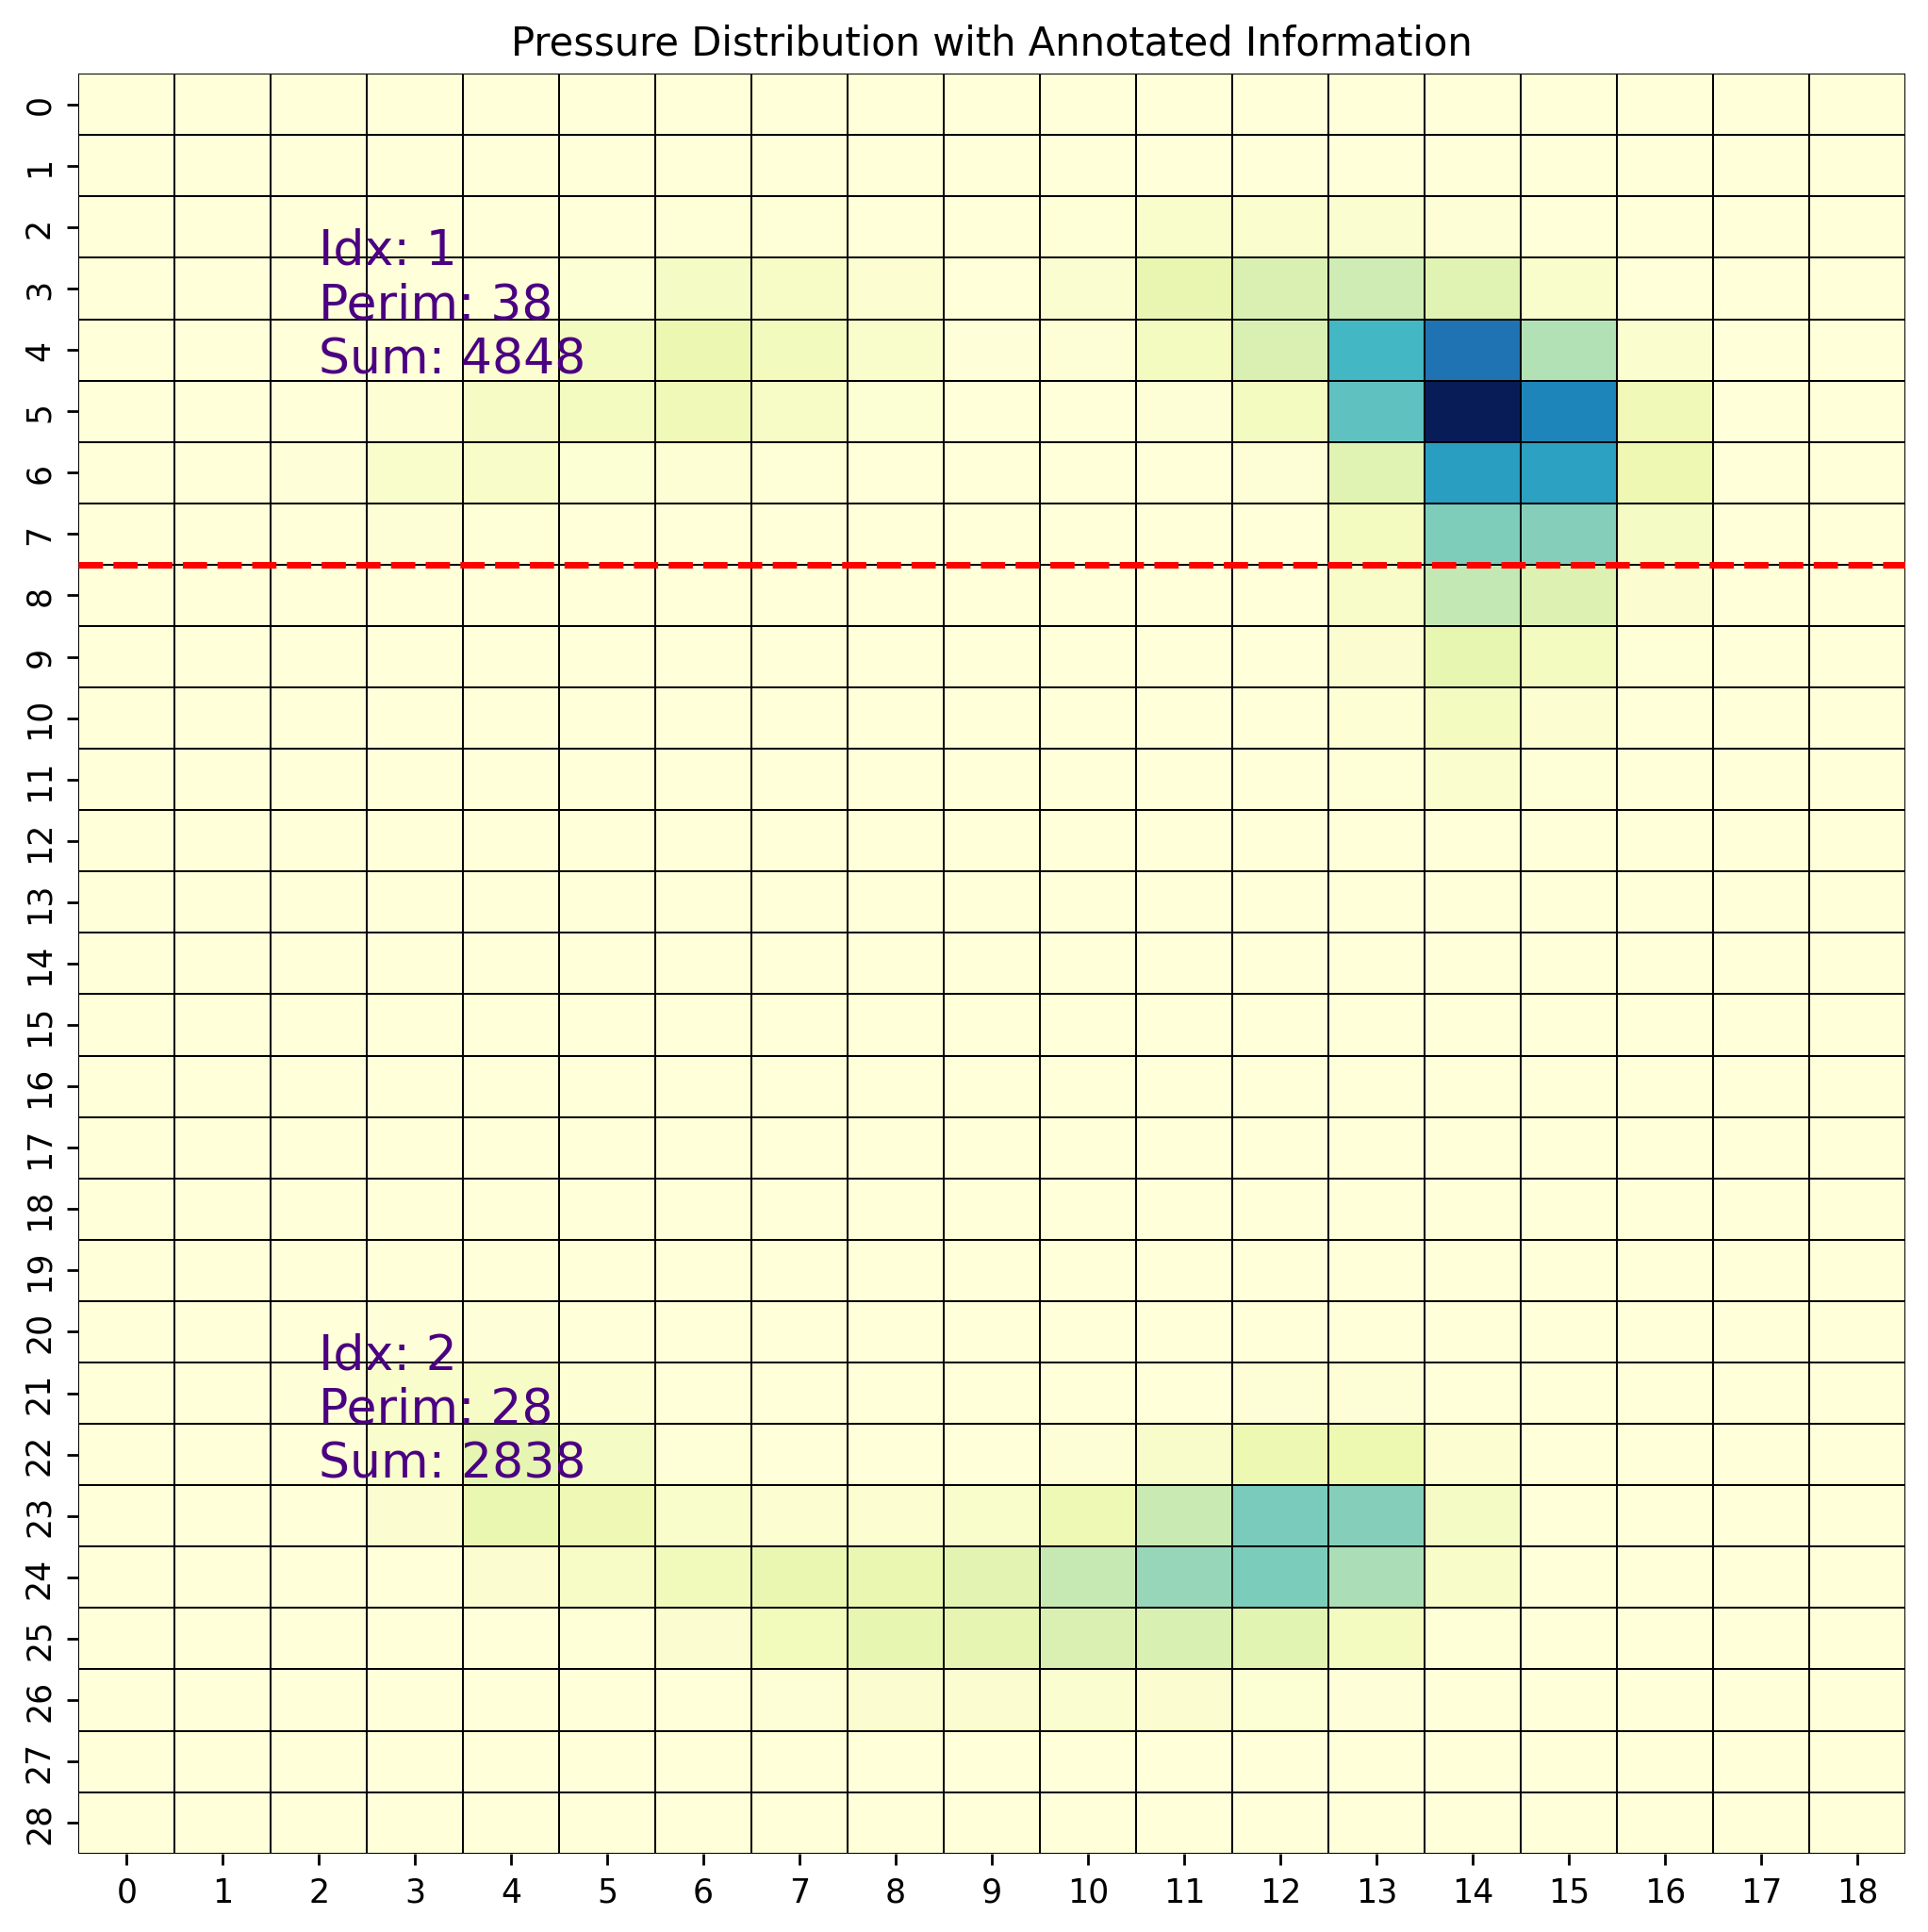

In [22]:
# Example grid
grid = [
    [1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 0],
    [1000, 1, 0, 0, 0, 2], 
    [0, 0, 0, 0, 0, 2]
]

for idx in range(5,10):

    """cleaned matrix"""
    matrix = remove_zero_rows_and_columns(X[idx])
    grid = matrix.tolist()

    """find best row"""
    best_row = find_best_row(grid)

    """find islands info"""
    islands_info = find_islands_info(grid)

    """plotting"""
    plotting(grid, islands_info, best_row)

# 2024-06-20 --- Discrete method by X and Y

In [40]:
print("use island function to get digitalized result as ls_result: ")
# init list of result 
ls_result = []
for i in range(len(Y)): 
    # print("---", Y[i], numIslands(X[i].tolist()))
    """use func to get result"""
    ls_result.append(numIslands(X[i].tolist()))

use island function to get digitalized result as ls_result: 


In [41]:
""" 
Given a ls (list[int]), which is the sum of islands from each hoof 
apply the logic and return yes (risky) or no
"""
def give_score(ls):
    # sort 
    ls.sort(reverse=True) 
    
    # if only one big island
    if len(ls) <= 1: 
        return 1
    
    # or other small islands are neglectable
    elif ls[0] > sum(ls[1:])*5: 
        return 1 
    
    # else the hoof is fine 
    else: 
        return 0 

In [42]:
print("apply logic function to get score from island counts")
ls_given_score = [] 
for ls in ls_result: 
    """apply func"""
    ls_given_score.append(give_score(ls))

apply logic function to get score from island counts


In [43]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1 = f1_score(ls_given_score, Y)

print(f'F1 Score: {f1}')

F1 Score: 0.7852760736196318


In [45]:
PRINT = False
for i in range(len(Y)): 
    if Y[i] != ls_given_score[i] and PRINT:
        print("i: ", i)
        print("true and pred: ", Y[i], ls_given_score[i])
        print("result: ", ls_result[i])
        print_hoof(X[i])
        plt.imshow(X[i])
        plt.show()
        print("-----------------")